# K-means Clustering for Customer Segmentation

This project applies the K-means clustering algorithm to segment customers of a retail store based on their purchase history. By clustering customers with similar behaviors, the store can better understand customer patterns and tailor marketing strategies.

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Setting Environment Variables for CPU and Thread Control

LOKY_MAX_CPU_COUNT: Limits the number of CPUs used by processes that may attempt to spawn multiple threads.

OMP_NUM_THREADS: Controls the maximum number of threads for parallel execution, setting it to 1 to prevent multi-threading.

These settings ensure that only one CPU and one thread are used during computation, which can be useful in environments with limited resources or for debugging purposes.

In [23]:
os.environ['LOKY_MAX_CPU_COUNT'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'

# Loading Customer Data

In [24]:
data=pd.read_csv(r"D:\2024\ALL FILES\AMRITA NOTES\certificate\internship\prodigy infotech\datasets\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data.shape

(200, 5)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Data Selection and Feature Preparation

The dataset is filtered to include the relevant columns for customer segmentation. Specifically, the Annual Income and Spending Score features are selected for clustering using the K-means algorithm.

By focusing on these two features, the K-means algorithm can group customers based on their income and spending patterns.



In [29]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

# Pair Plot Visualization

A pair plot is created to visualize the relationships between different features in the dataset, with data points color-coded by gender. This helps to understand how features like age, annual income, and spending score vary across male and female customers.

<Figure size 1600x1000 with 0 Axes>

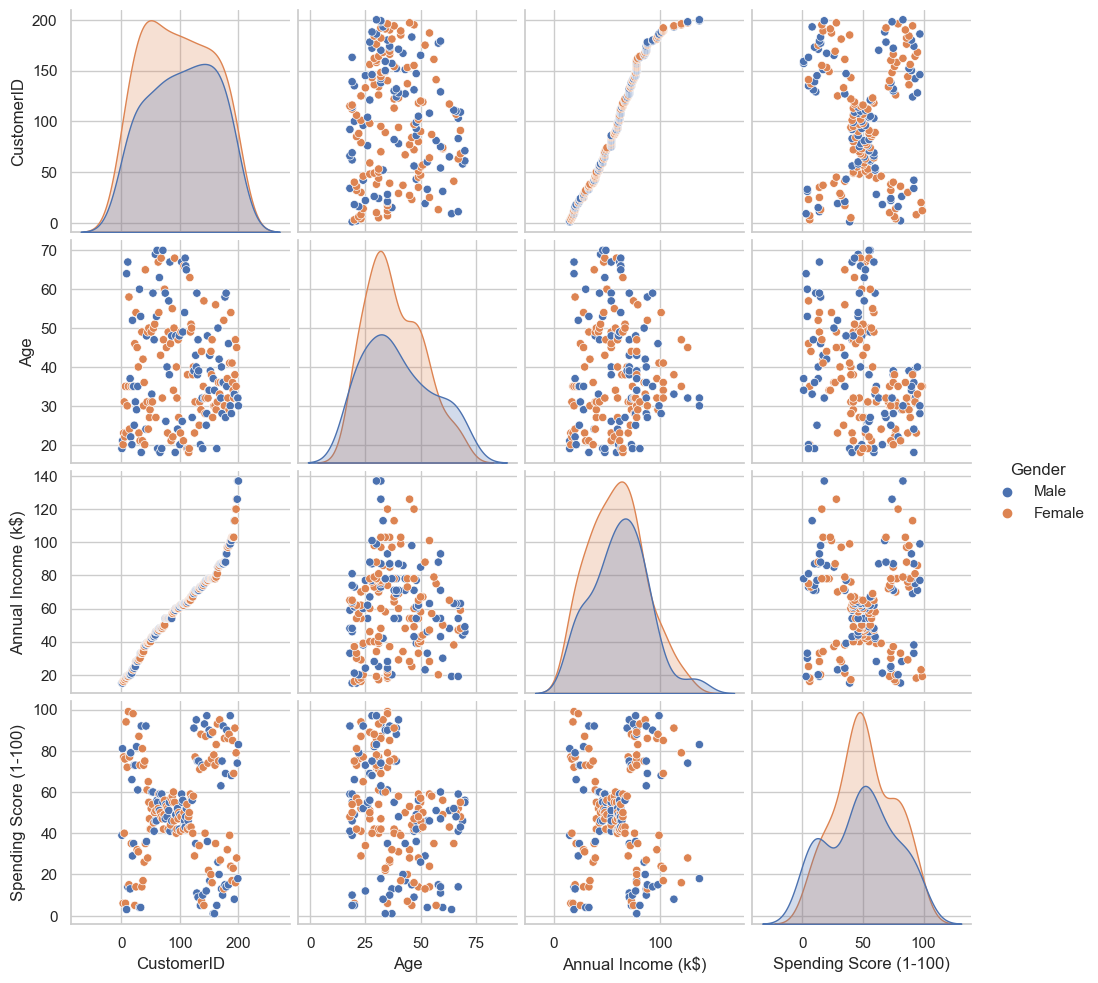

In [30]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data, hue='Gender')
plt.show()

# Gender Distribution Visualization

A count plot is used to visualize the distribution of customers based on their gender, providing a clear understanding of the dataset's composition.

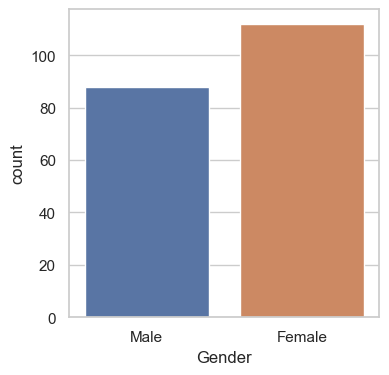

In [31]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=data)
plt.show()

# Correlation Matrix

A correlation matrix is computed to quantify the relationships between numeric features in the dataset. The matrix helps to identify how different features, such as age, annual income, and spending score, are related to each other.

In [34]:
correlation_matrix = data.corr(numeric_only=True)

print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


# Distribution of Annual Income

A histogram plot is used to visualize the distribution of customer annual income, providing insights into the income ranges of the retail store's customer base. The plot also includes a kernel density estimate (KDE) to smooth out the distribution curve.

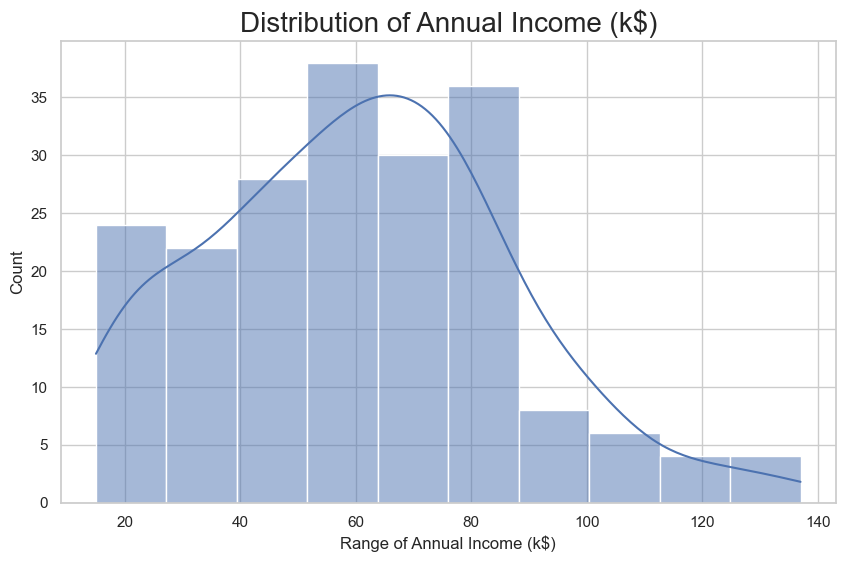

In [36]:
# Distribution of Annual Income using histplot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# Distribution of Age

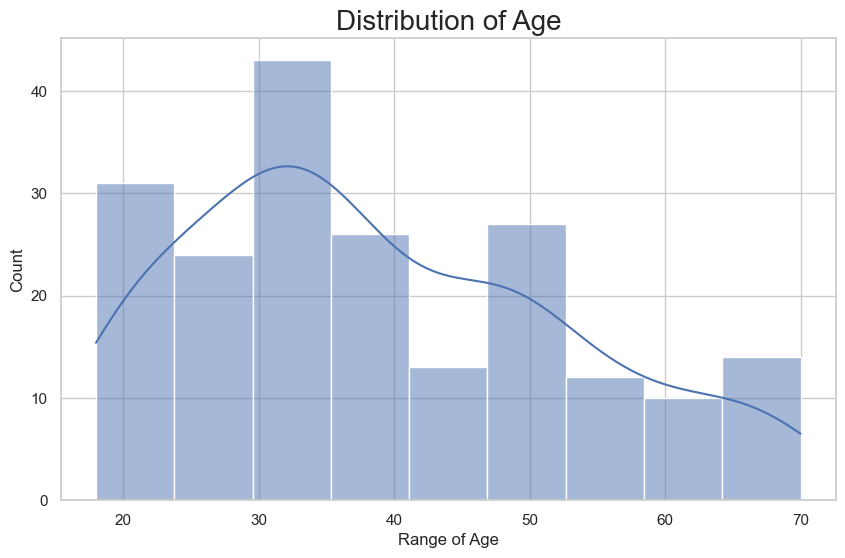

In [38]:
# Distribution of Age using histplot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

# Distribution of Spending Score

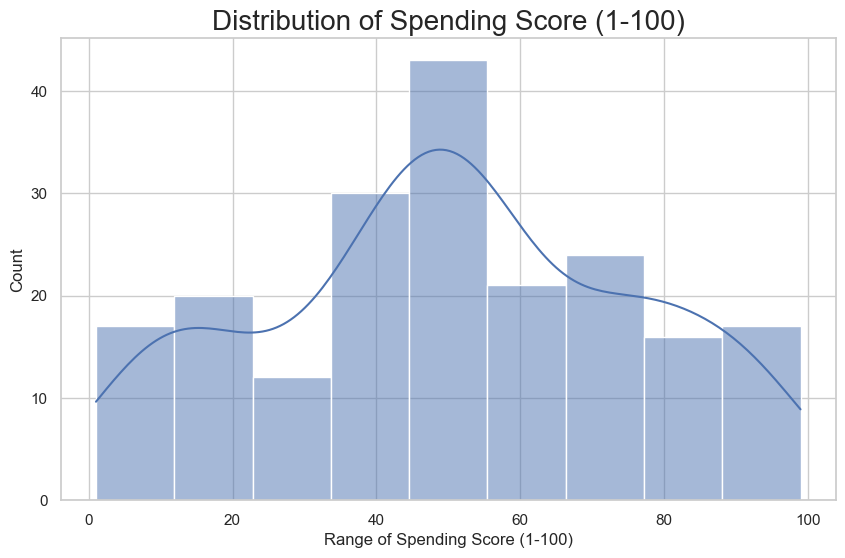

In [39]:
# Distribution of Spending Score using histplot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

# Elbow Method for Optimal Number of Clusters

The Elbow Method is used to determine the optimal number of clusters for K-means clustering by evaluating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The goal is to find the "elbow" point where adding more clusters does not significantly improve the model.

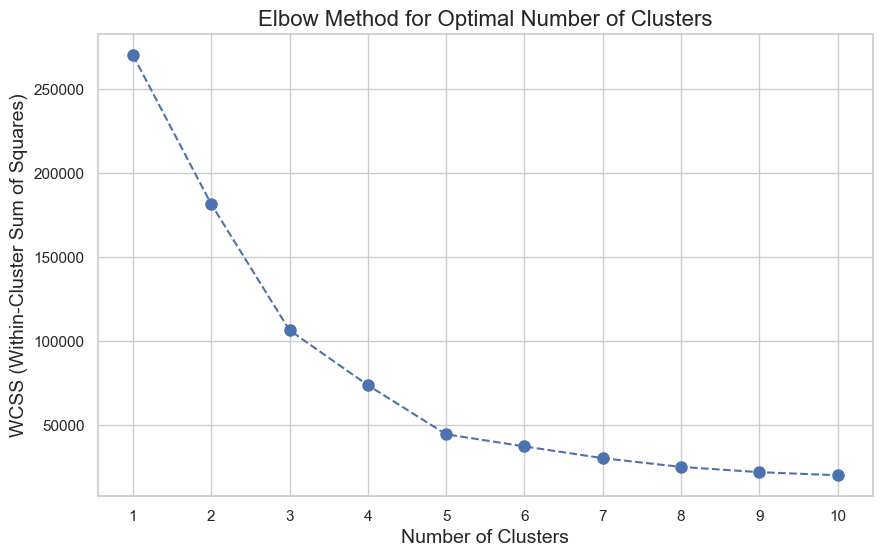

In [43]:
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Calculate Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b', markersize=8)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [46]:
import warnings
# Suppress FutureWarning related to n_init
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Set the number of clusters
n_clusters = 5

# Initialize KMeans with a specified number of clusters and n_init to suppress warning
km1 = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)

# Fit the model with the data
km1.fit(X)

# Predict the cluster labels
y = km1.predict(X)

# Add the labels to the dataframe as a new column
df1["label"] = y

# Display the new dataframe with clustering labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Scatter Plot of Clusters


A scatter plot is used to visualize the clusters formed by the K-means algorithm. The plot shows how customers are grouped based on their annual income and spending score, with different colors representing different clusters.

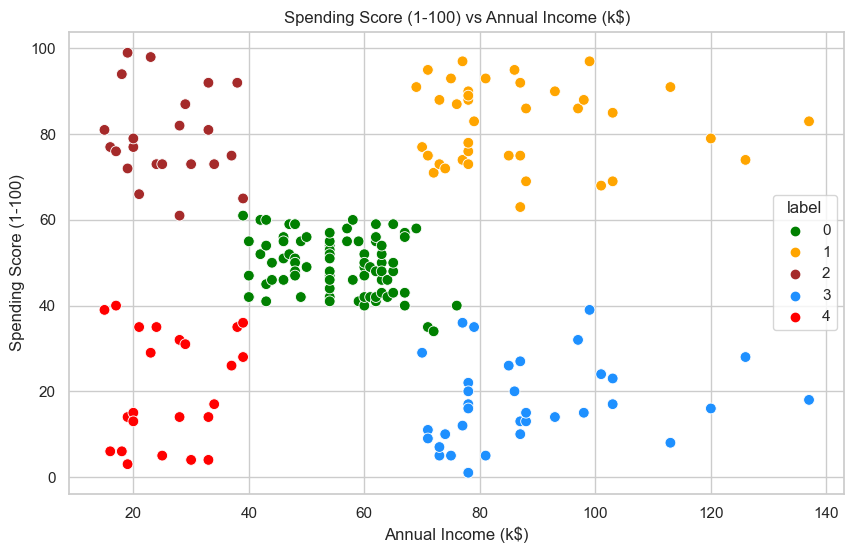

In [51]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# Within-Cluster Sum of Squared Errors (WSS) for Different k Values


The Within-Cluster Sum of Squared Errors (WSS) is calculated for various values of k to determine the optimal number of clusters for the K-means algorithm. This method helps identify the best k by plotting the WSS against different k values.

The resulting plot helps identify the optimal number of clusters by showing where the WCSS reduction rate slows down, indicating the "elbow" point.

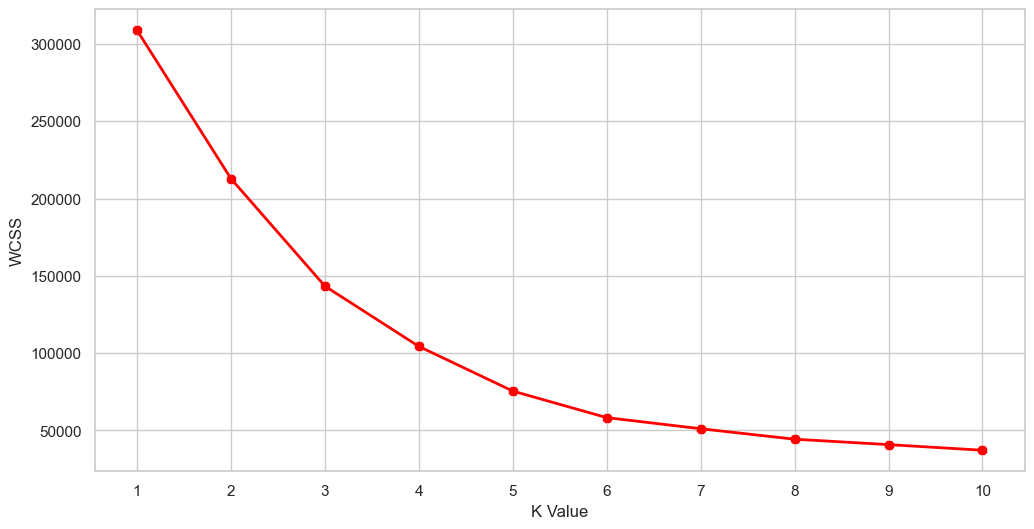

In [52]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# Applying K-means Clustering with Optimal Number of Clusters

Based on the WSS plot, we choose the optimal number of clusters (k=5) where the reduction in WSS starts to diminish. We then apply K-means clustering with this number of clusters and add the cluster labels to the DataFrame.

In [54]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km2.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# Analyzing and Visualizing Customer Clusters

C:\Users\admin\AppData\Local\Temp\ipykernel_18428\961542242.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df1.groupby('label').mean()


Cluster Summary:
        CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
label                                                                   
0      163.500000  40.666667           87.750000               17.583333
1       86.265823  43.088608           55.291139               49.569620
2      162.000000  32.692308           86.538462               82.128205
3       24.000000  25.521739           26.304348               78.565217
4       23.000000  45.217391           26.304348               20.913043


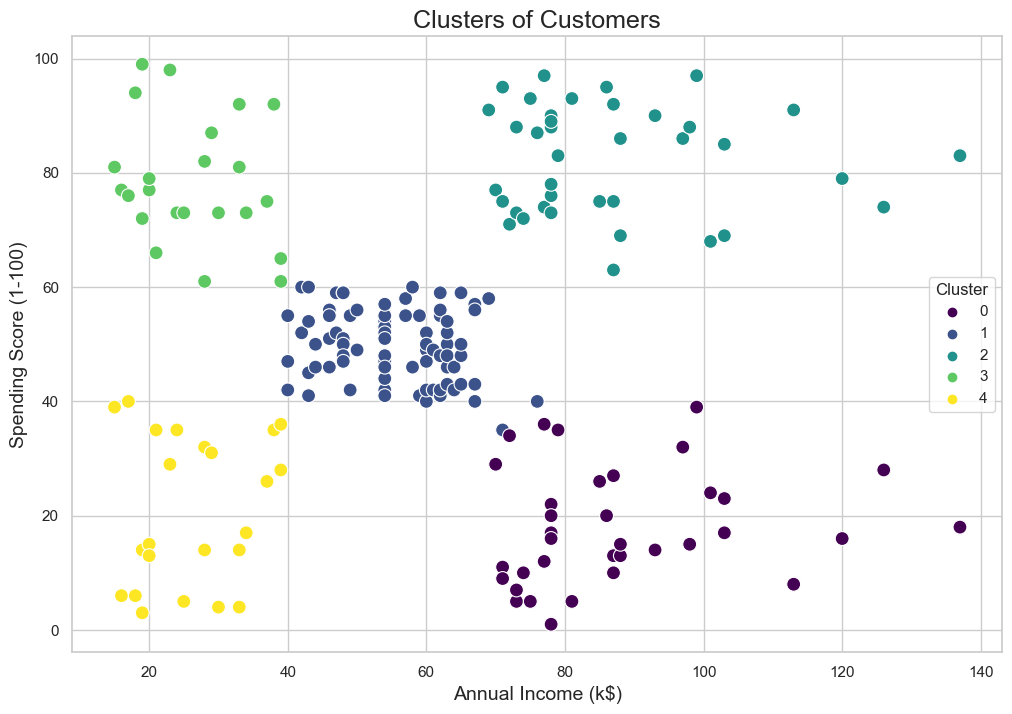

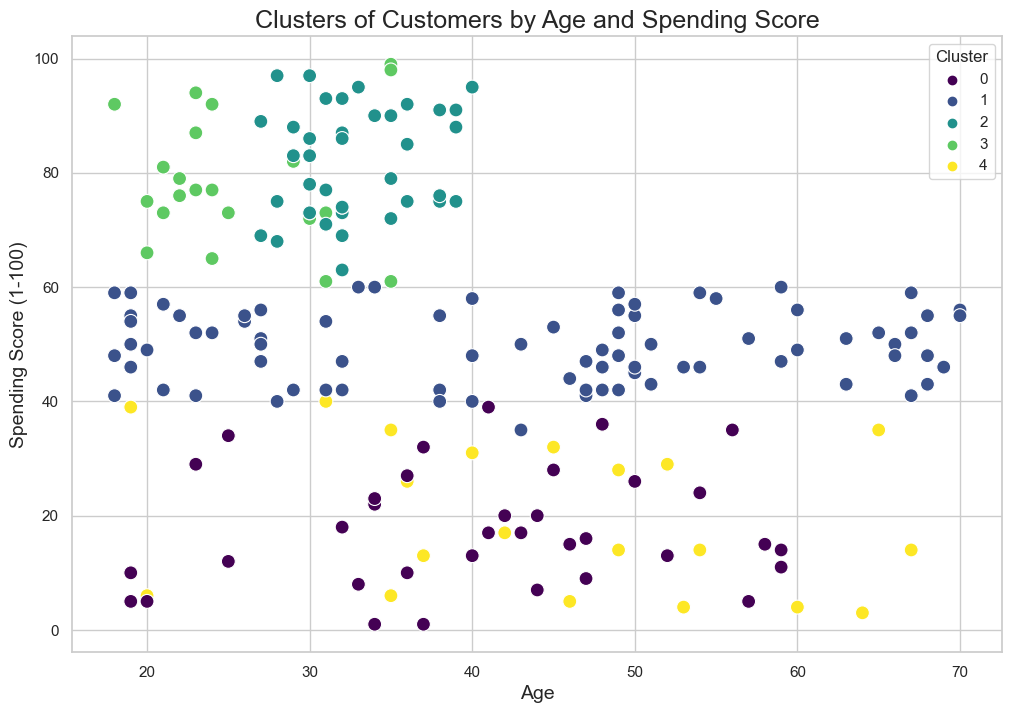

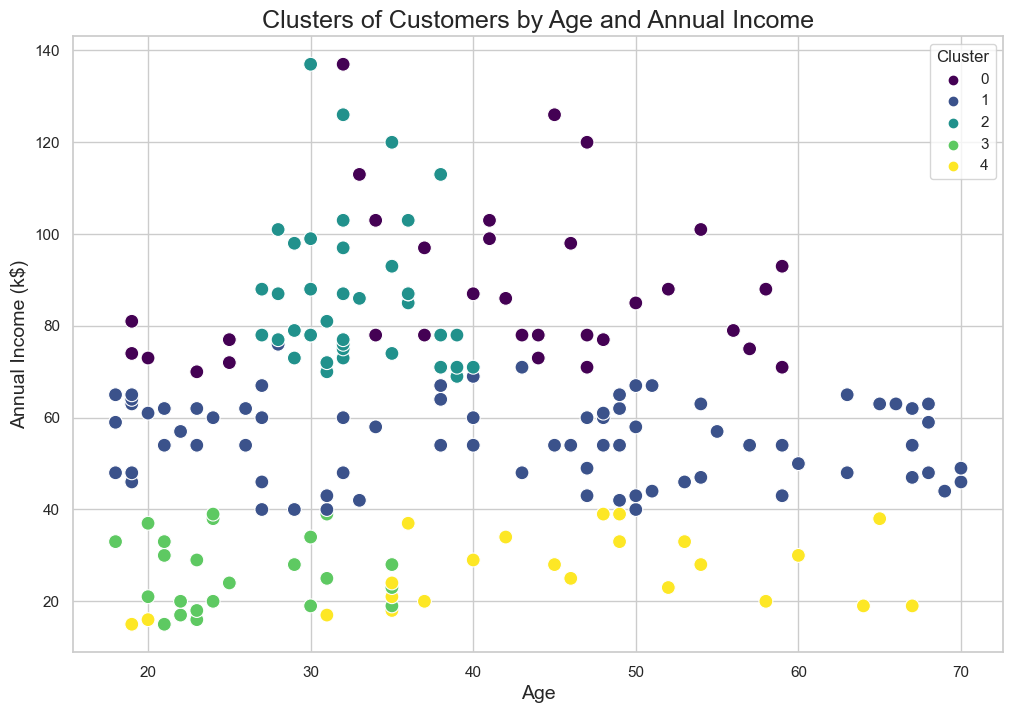

In [55]:
# Step 1: Analyze the Clusters
# Group the data by the cluster label and calculate the mean for each feature
cluster_summary = df1.groupby('label').mean()
print("Cluster Summary:\n", cluster_summary)

# Step 2: Visualize the Clusters
# Scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', palette='viridis', s=100)
plt.title('Clusters of Customers', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Additional Scatter Plots
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='Age', y='Spending Score (1-100)', hue='label', palette='viridis', s=100)
plt.title('Clusters of Customers by Age and Spending Score', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='Age', y='Annual Income (k$)', hue='label', palette='viridis', s=100)
plt.title('Clusters of Customers by Age and Annual Income', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income (k$)', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#Save the DataFrame with Cluster Labels
df1.to_csv('clustered_data.csv', index=False)


# 3D Visualization of Customer Clusters

This code generates a 3D scatter plot to visualize customer clusters based on three features: Age, Annual Income, and Spending Score.

The 3D scatter plot provides a visual representation of how customer clusters are distributed across Age, Annual Income, and Spending Score. Each point represents a customer, and different colors indicate different clusters. By examining the plot, you can identify patterns and relationships between the features, such as how different age groups or income levels relate to spending behavior within each cluster. This visualization helps in understanding the segmentation of customers in three dimensions, offering insights into their characteristics and behaviors.

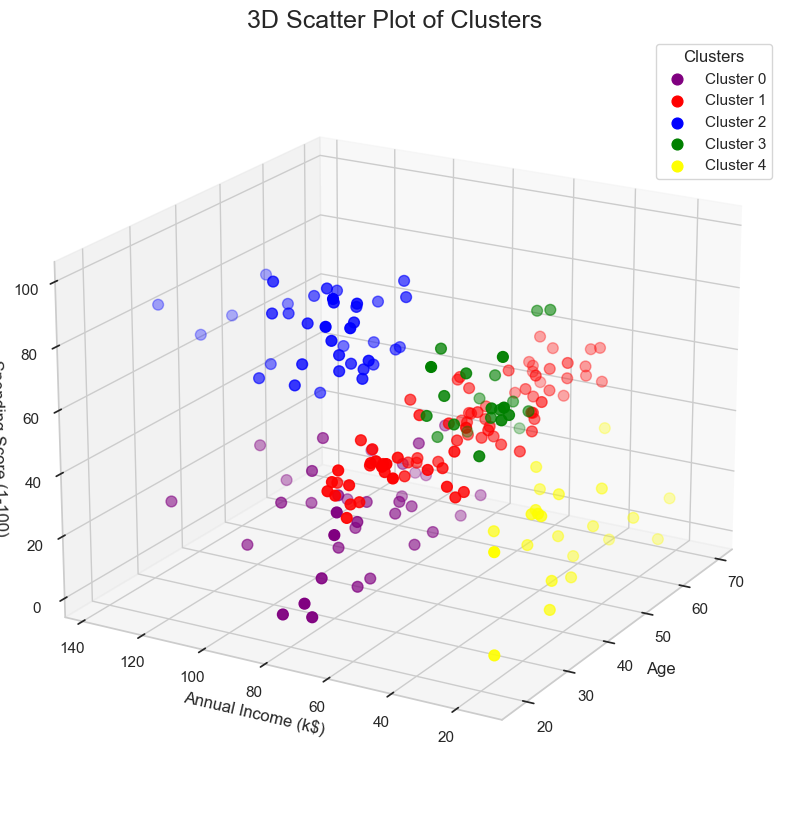

In [58]:
# Create 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['purple', 'red', 'blue', 'green', 'yellow']

# Plot each cluster with a different color
for i in range(5):
    cluster_data = df1[df1['label'] == i]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               color=colors[i], s=60, label=f'Cluster {i}')

# Customize view angle for better visualization
ax.view_init(elev=20, azim=210)

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Set title
plt.title('3D Scatter Plot of Clusters', fontsize=18)

# Add a legend
ax.legend(title='Clusters')

# Show grid
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

# Analyzing Customer Distribution Across Clusters

This code snippet provides a detailed breakdown of each customer cluster by printing the number of customers and their IDs for each cluster, with corresponding colors used in the 3D plot.

This code helps in understanding the composition of each cluster by displaying the number of customers and their IDs. It provides insights into the size of each cluster and allows for further analysis or targeted actions based on customer IDs.

In [61]:
# Print the number of customers and their IDs for each cluster with corresponding colors
for i, color in enumerate(['purple', 'red', 'blue', 'green', 'yellow']):
    cluster_data = df1[df1['label'] == i]
    print(f'Number of customers in Cluster {i} (color {color}): {len(cluster_data)}')
    print('Customer IDs:', cluster_data['CustomerID'].values)
    print('-' * 40)


Number of customers in Cluster 0 (color purple): 36
Customer IDs: [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
----------------------------------------
Number of customers in Cluster 1 (color red): 79
Customer IDs: [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]
----------------------------------------
Number of customers in Cluster 2 (color blue): 39
Customer IDs: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
----------------------------------------
Number of customers in Cluster 3 (color green): 23
Cust

In [62]:
# Calculate mean and median values for each cluster
cluster_summary = df1.groupby('label').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median']
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['Cluster', 'Mean Age', 'Median Age', 'Mean Annual Income (k$)', 'Median Annual Income (k$)', 
                           'Mean Spending Score (1-100)', 'Median Spending Score (1-100)']

print(cluster_summary)


   Cluster   Mean Age  Median Age  Mean Annual Income (k$)  \
0        0  40.666667        41.5                87.750000   
1        1  43.088608        47.0                55.291139   
2        2  32.692308        32.0                86.538462   
3        3  25.521739        24.0                26.304348   
4        4  45.217391        46.0                26.304348   

   Median Annual Income (k$)  Mean Spending Score (1-100)  \
0                       83.0                    17.583333   
1                       54.0                    49.569620   
2                       79.0                    82.128205   
3                       25.0                    78.565217   
4                       25.0                    20.913043   

   Median Spending Score (1-100)  
0                           16.0  
1                           50.0  
2                           83.0  
3                           77.0  
4                           17.0  


# 3D Scatter Plot with Cluster Centroids

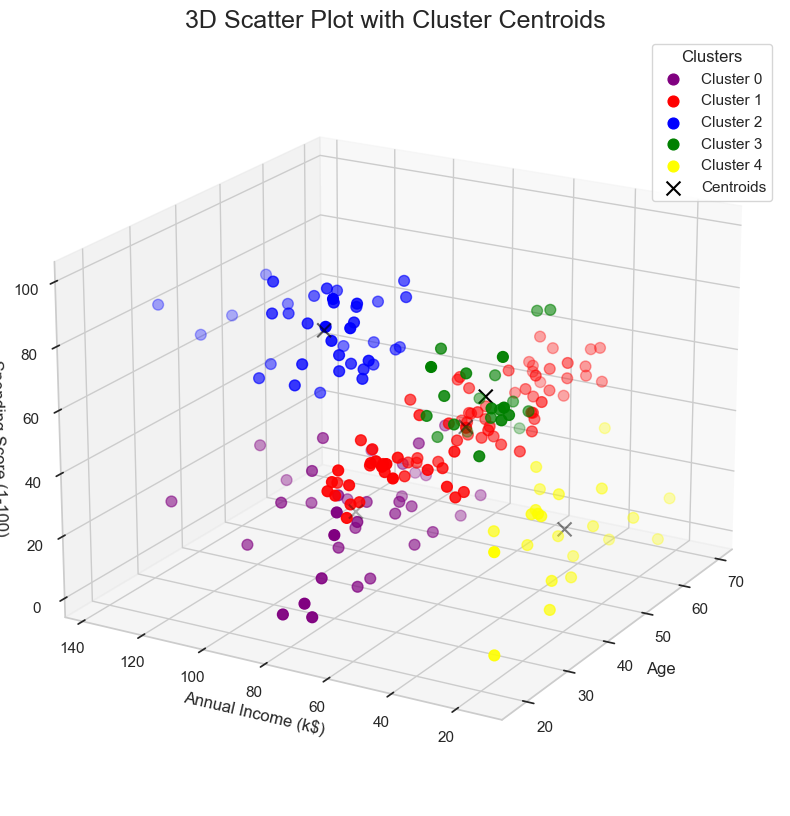

In [64]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X2)
centroids = kmeans.cluster_centers_

# 3D plot with centroids
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for i in range(5):
    cluster_data = df1[df1['label'] == i]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               color=colors[i], s=60, label=f'Cluster {i}')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='black', s=100, marker='x', label='Centroids')

# Customize view angle
ax.view_init(elev=20, azim=210)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Scatter Plot with Cluster Centroids', fontsize=18)

# Add legend and grid
ax.legend(title='Clusters')
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()
